In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import os
#os.getcwd()

Loading data sets:

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_len = len(train)
test_len = len(test)

In [6]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Cleaning data

In [10]:
# NaN values in each column
print(train.isna().sum())

# Looking at NaN % within the data
nan = pd.DataFrame(train.isna().sum(), columns = ['NaN_sum'])
nan['feat'] = nan.index
nan['Perc(%)'] = (nan['NaN_sum']/1460)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Perc(%)'] > 20, 'Discard', 'Keep')
nan


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


NaN_sum          feat    Perc(%) Usability
Electrical          1    Electrical   0.068493      Keep
MasVnrType          8    MasVnrType   0.547945      Keep
MasVnrArea          8    MasVnrArea   0.547945      Keep
BsmtQual           37      BsmtQual   2.534247      Keep
BsmtCond           37      BsmtCond   2.534247      Keep
BsmtFinType1       37  BsmtFinType1   2.534247      Keep
BsmtExposure       38  BsmtExposure   2.602740      Keep
BsmtFinType2       38  BsmtFinType2   2.602740      Keep
GarageCond         81    GarageCond   5.547945      Keep
GarageQual         81    GarageQual   5.547945      Keep
GarageFinish       81  GarageFinish   5.547945      Keep
GarageType         81    GarageType   5.547945      Keep
GarageYrBlt        81   GarageYrBlt   5.547945      Keep
LotFrontage       259   LotFrontage  17.739726      Keep
FireplaceQu       690   FireplaceQu  47.260274   Discard
Fence            1179         Fence  80.753425   Discard
Alley            1369         Alley  93.767123   Discard
MiscFeature      1406   MiscFeature  96.301370   Discard
PoolQC           1453        PoolQC  99.520548   Discard

In [289]:
def clean(df):
    # fixing some typos
    df['Exterior2nd'] = df['Exterior2nd'].replace({'Brk Cmn': 'BrkComm'})
    # fixing incorrect year
    df['GarageYrBlt'] = df['GarageYrBlt'].where(df['GarageYrBlt'] <= 2010, df['YearBuilt'])
    
    return df

In [290]:
# numerical features
numerical = [i for i in train.columns if (train.dtypes[i] != 'object')]

# categorical features
categorical = ["MSSubClass", "MSZoning", "Street", "Alley", "LandContour", "LotConfig", 
                "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", 
                "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", 
                "Foundation", "Heating", "CentralAir", "GarageType", "MiscFeature", 
                "SaleType", "SaleCondition"]

# ordinal features:

# levels for ordinal features:
five_levels = ["Po", "Fa", "TA", "Gd", "Ex"]
ten_levels = list(range(10))

ordinal = {
    "OverallQual": ten_levels,
    "OverallCond": ten_levels,
    "ExterQual": five_levels,
    "ExterCond": five_levels,
    "BsmtQual": five_levels,
    "BsmtCond": five_levels,
    "HeatingQC": five_levels,
    "KitchenQual": five_levels,
    "FireplaceQu": five_levels,
    "GarageQual": five_levels,
    "GarageCond": five_levels,
    "PoolQC": five_levels,
    "LotShape": ["Reg", "IR1", "IR2", "IR3"],
    "LandSlope": ["Sev", "Mod", "Gtl"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"],
    "BsmtFinType1": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Functional": ["Sal", "Sev", "Maj1", "Maj2", "Mod", "Min2", "Min1", "Typ"],
    "GarageFinish": ["Unf", "RFn", "Fin"],
    "PavedDrive": ["N", "P", "Y"],
    "Utilities": ["NoSeWa", "NoSewr", "AllPub"],
    "CentralAir": ["N", "Y"],
    "Electrical": ["Mix", "FuseP", "FuseF", "FuseA", "SBrkr"],
    "Fence": ["MnWw", "GdWo", "MnPrv", "GdPrv"],
}

# adding a None level for NaN values
ordinal = {key: ["None"] + value for key, value in
                  ordinal.items()}


# encoding the datatype of features
def encode(df):
    
    # categorical
    for name in categorical:
        df[name] = df[name].astype("category")
        # adding a None category for NaN values
        
        if "None" not in df[name].cat.categories:
            df[name].cat.add_categories("None", inplace=True)
            
    # ordinal
    for name, levels in ordinal.items():
        df[name] = df[name].astype(CategoricalDtype(levels,
                                                    ordered=True))
    return df

In [291]:
# handling the missing values. test imputing median, 'None' for NaN
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(df[name].median())
    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")
    return df

In [292]:
data = pd.concat([train, test])

# preprocessing
data = clean(data)
data = encode(data)
data = impute(data)

data_len = len(data)

# splitting back
train = data[:train_len]
test = data[train_len:]

In [293]:
len(test)

1459

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2919 non-null   int64   
 1   MSSubClass     2919 non-null   category
 2   MSZoning       2919 non-null   category
 3   LotFrontage    2919 non-null   float64 
 4   LotArea        2919 non-null   int64   
 5   Street         2919 non-null   category
 6   Alley          2919 non-null   category
 7   LotShape       2919 non-null   category
 8   LandContour    2919 non-null   category
 9   Utilities      2919 non-null   category
 10  LotConfig      2919 non-null   category
 11  LandSlope      2919 non-null   category
 12  Neighborhood   2919 non-null   category
 13  Condition1     2919 non-null   category
 14  Condition2     2919 non-null   category
 15  BldgType       2919 non-null   category
 16  HouseStyle     2919 non-null   category
 17  OverallQual    2919 non-null   ca

# Visualization

Distribution of numerical features:

In [1]:
numeric_data = data[numeric]
numeric_data.hist(figsize=(20,30))

NameError: name 'data' is not defined

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

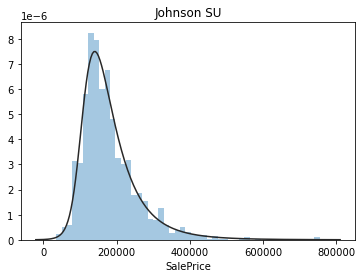

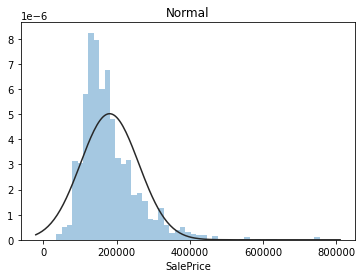

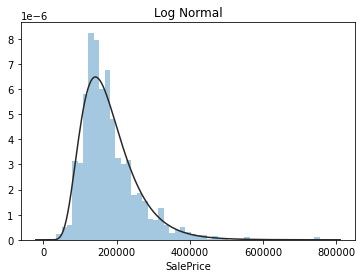

In [145]:
from scipy.stats import skew, norm

import scipy.stats as stats
y = data['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

Transform SalePrice using unbounded Johnson distribution.

In [216]:
# Skew and kurt
from scipy import stats

shap_t,shap_p = stats.shapiro(train['SalePrice'])

print("Skewness: %f" % abs(train['SalePrice']).skew())
print("Kurtosis: %f" % abs(train['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.882876
Kurtosis: 6.536282
Shapiro_Test: 0.869672
Shapiro_Test: 0.000000


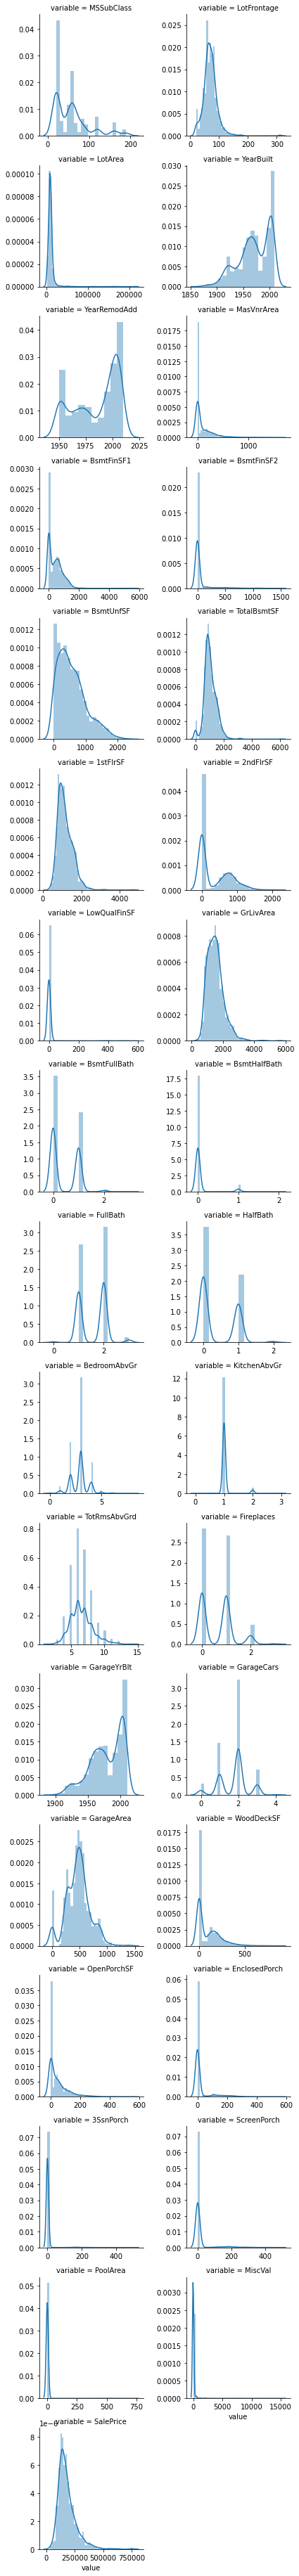

In [146]:
f = pd.melt(data, value_vars=numeric)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

#### Possible transformations: <br>
    Log transformation: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea, 1stFlrSF, GrLivArea
    

#### Count plots to show distribution of categorical, ordinal features:

In [147]:
def count_plot(feat,df):
    plt.figure(figsize=(20,5))
    sns.countplot(x=feat,data=df)
    plt.show()

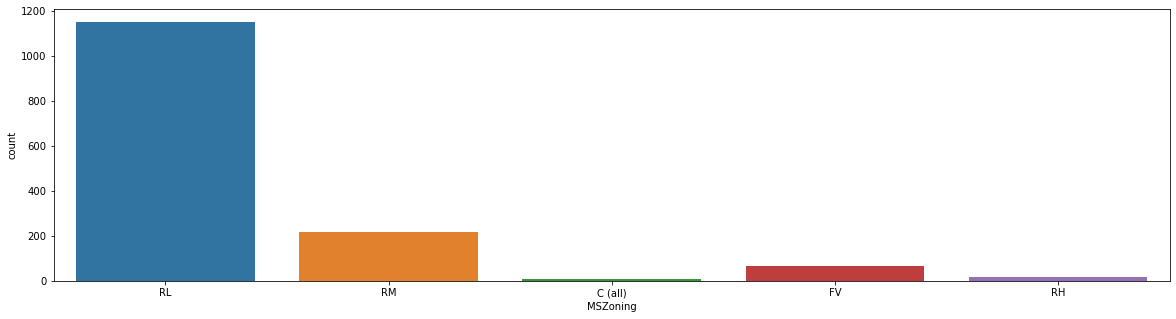

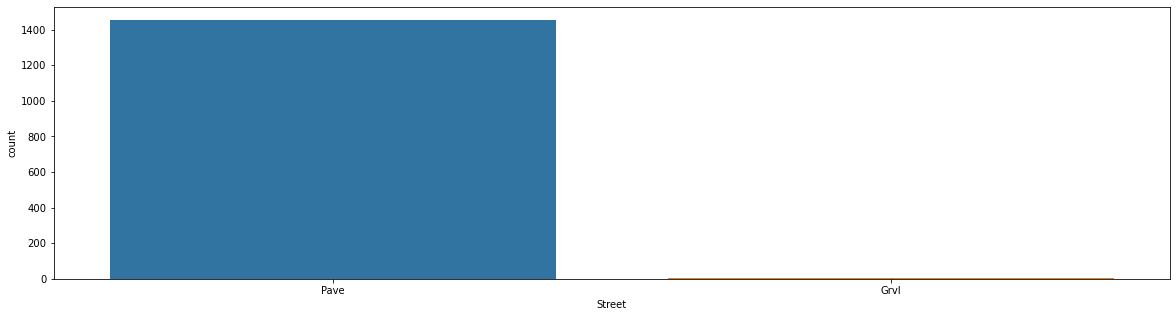

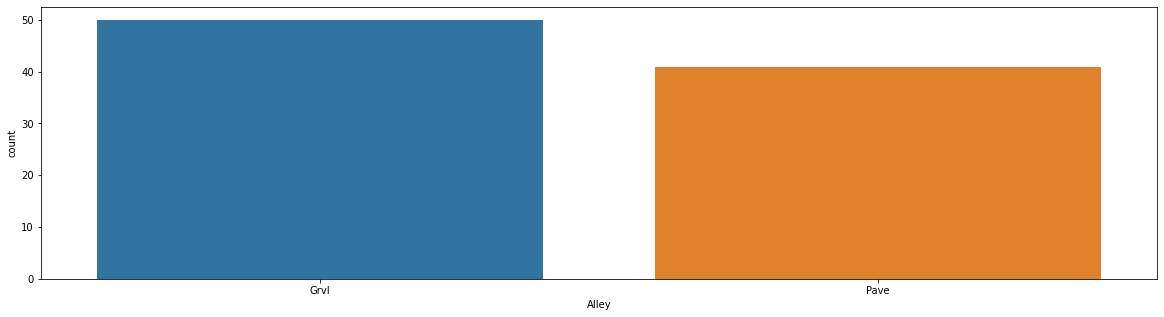

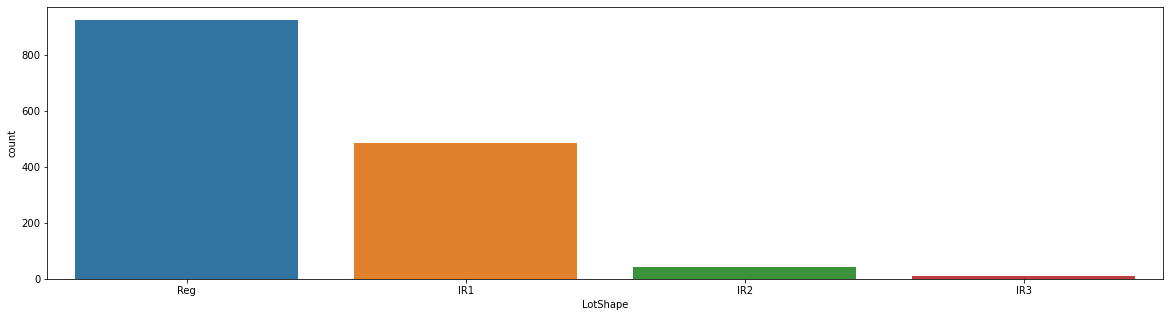

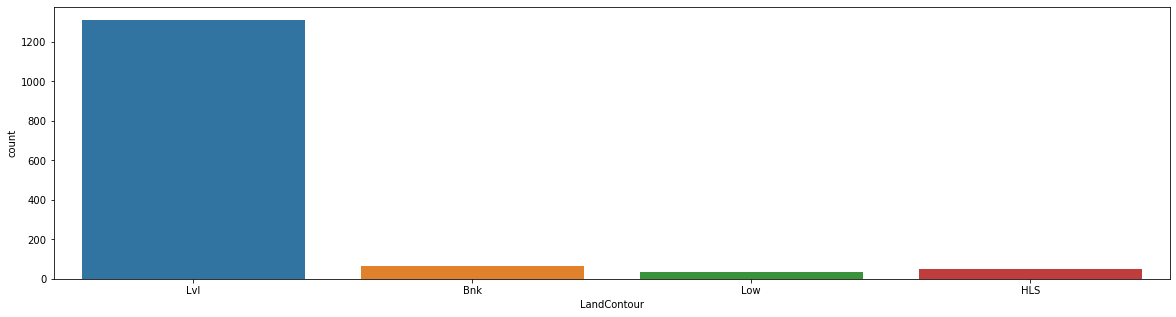

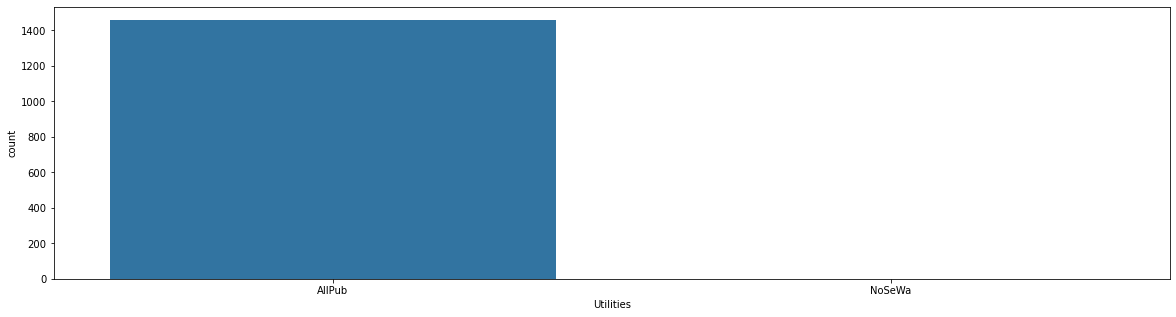

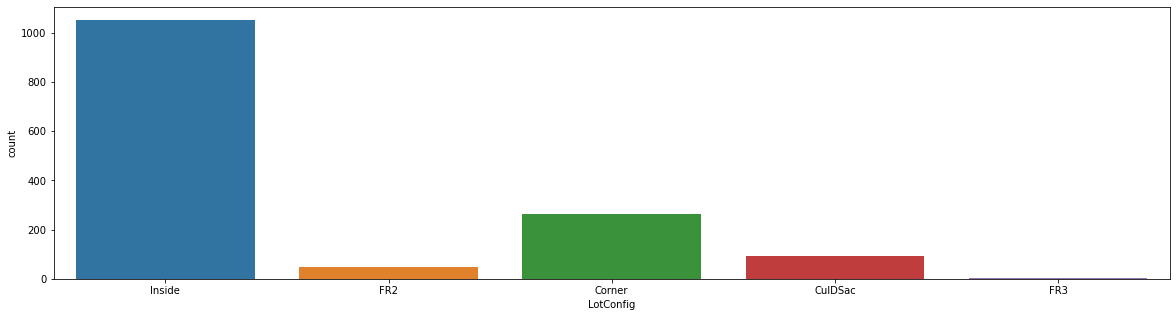

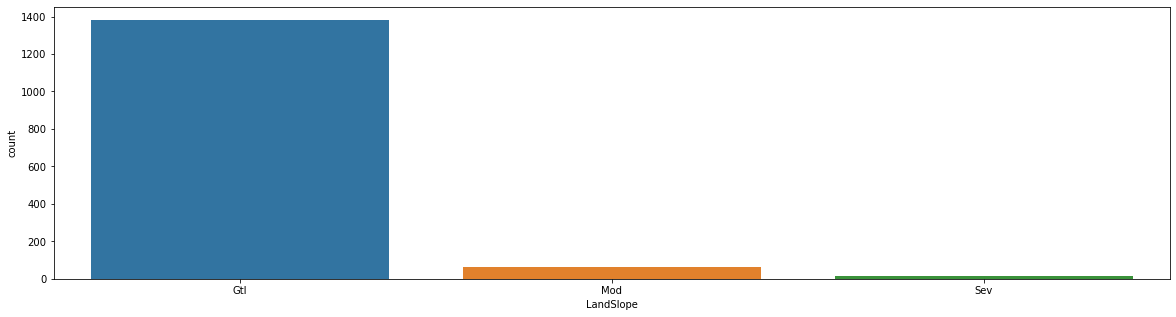

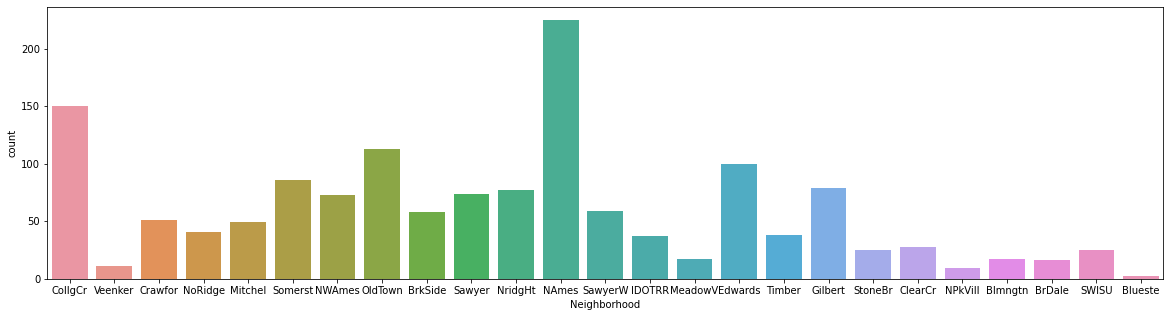

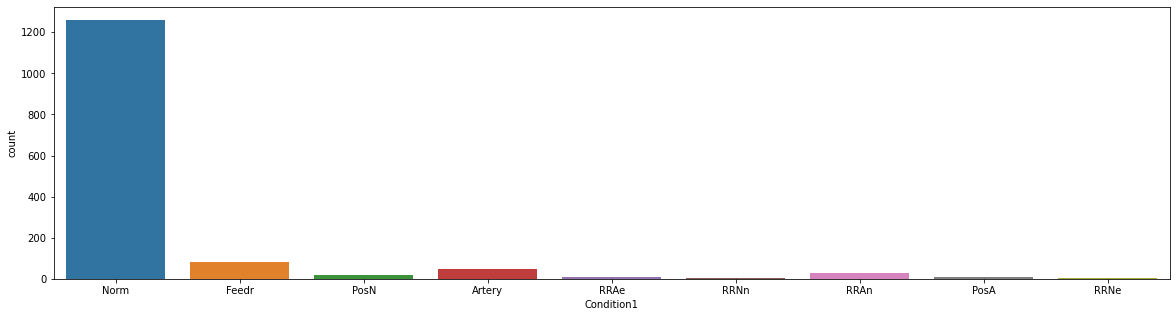

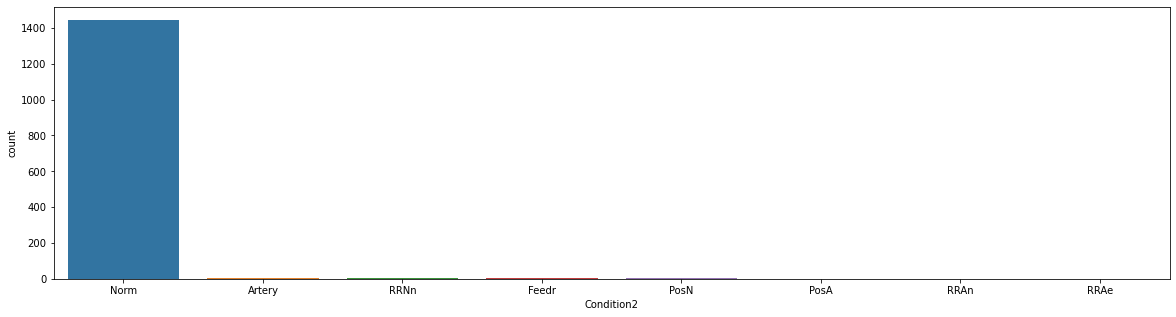

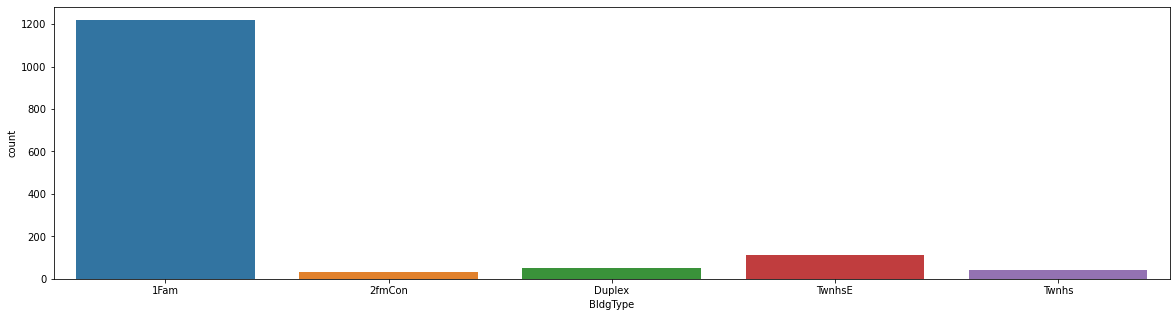

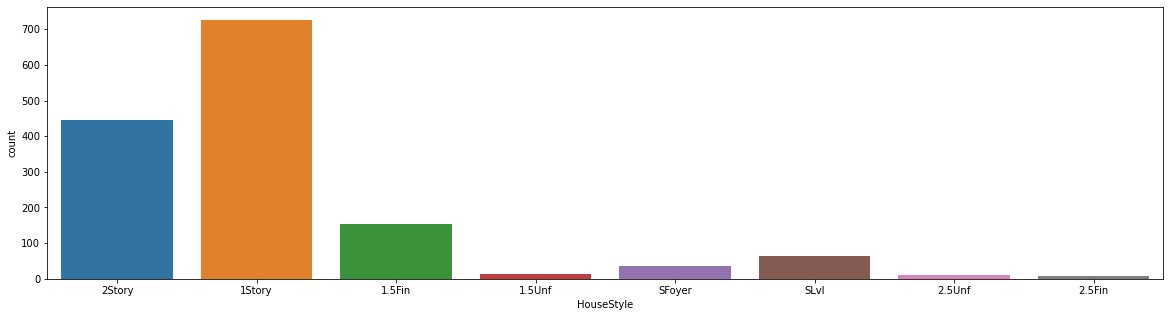

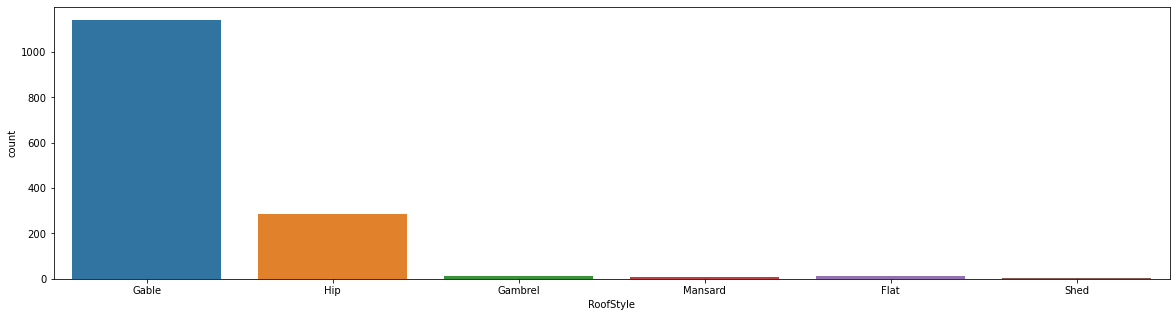

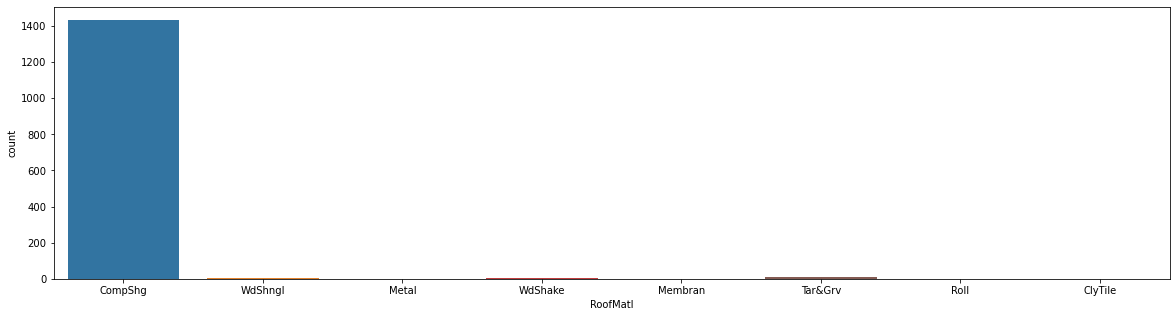

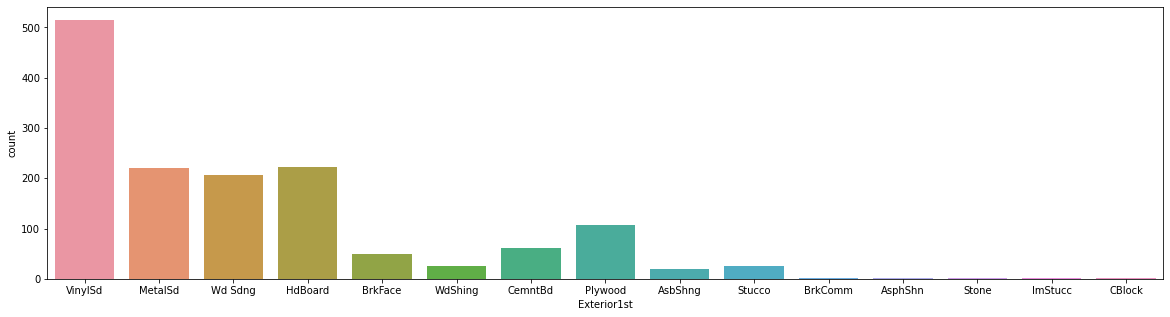

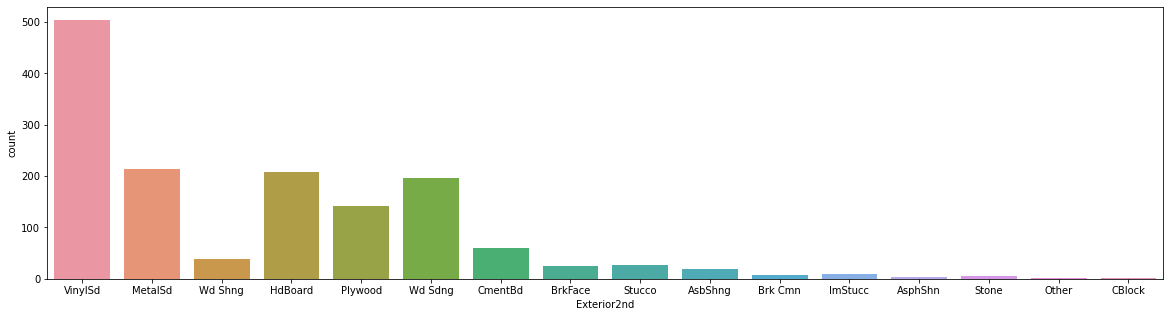

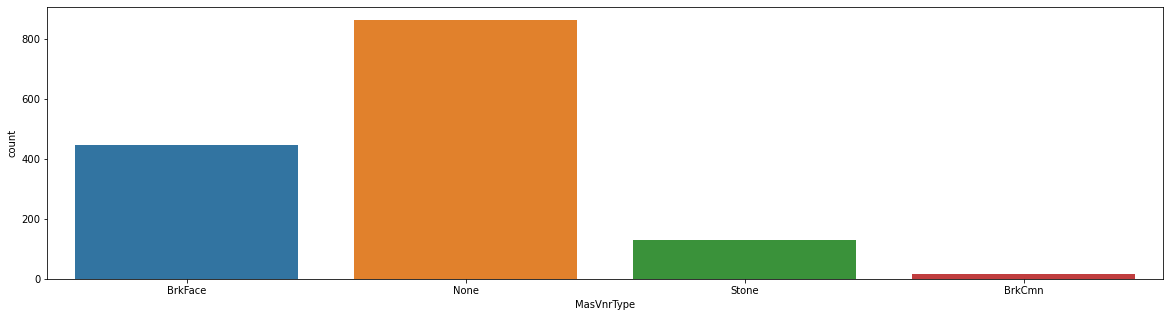

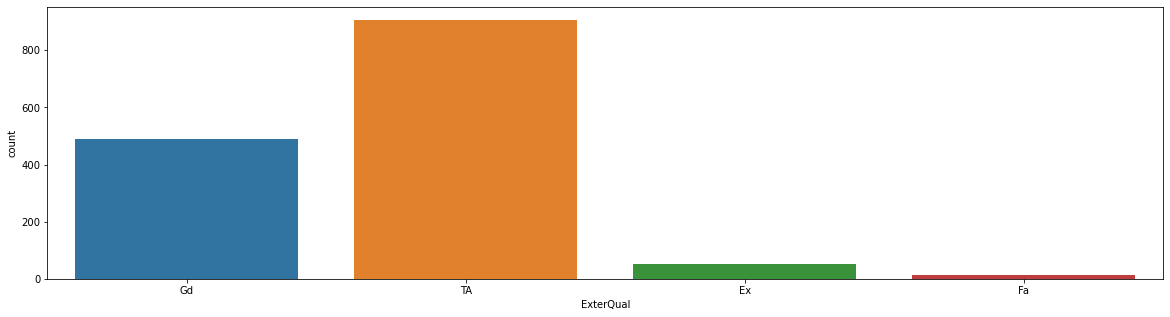

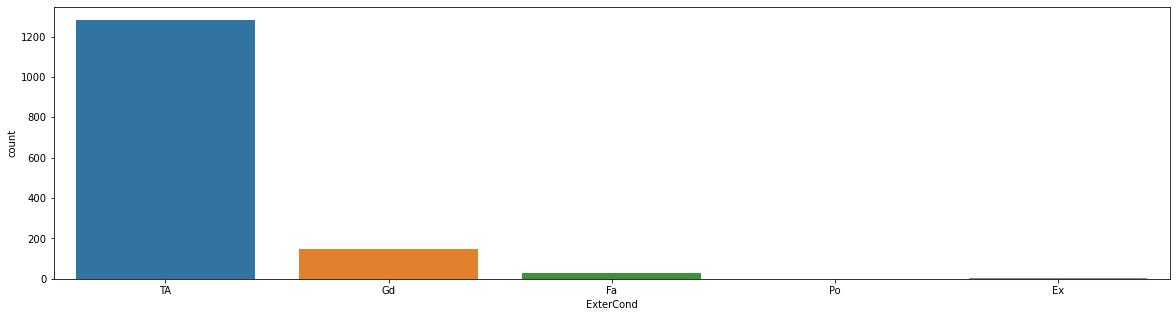

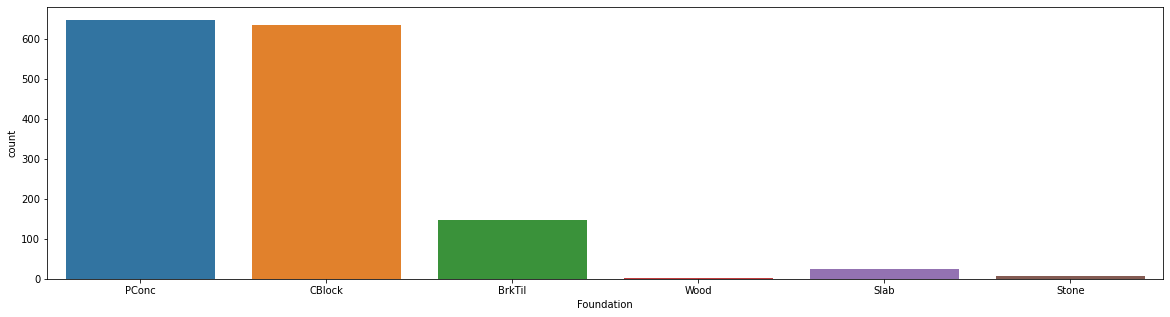

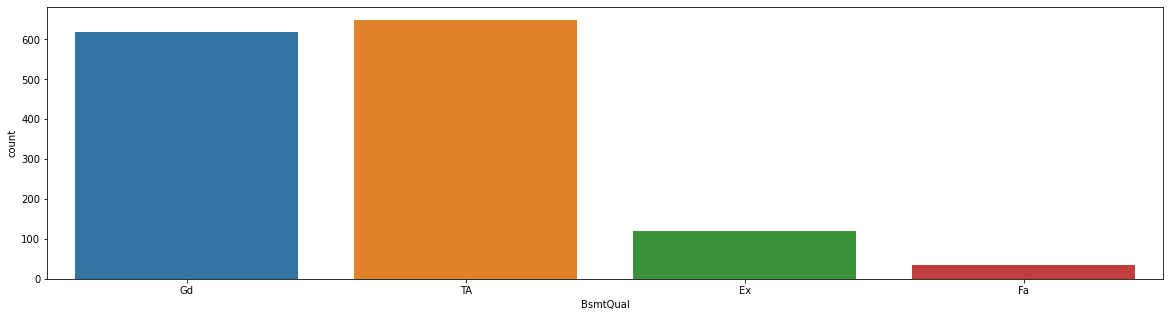

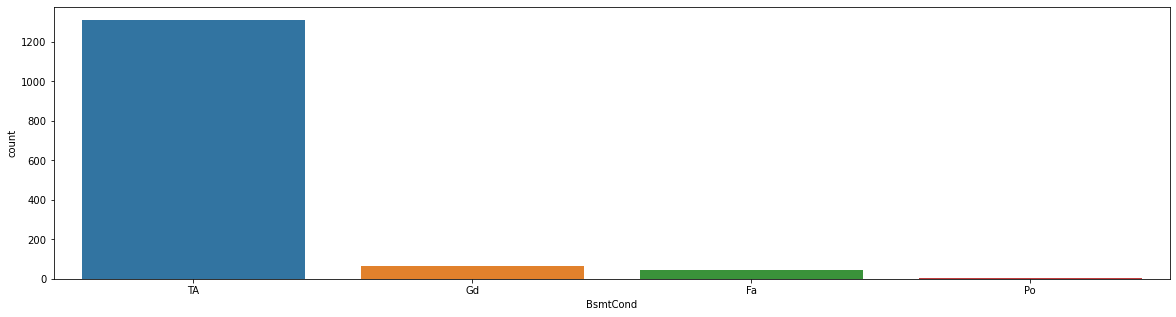

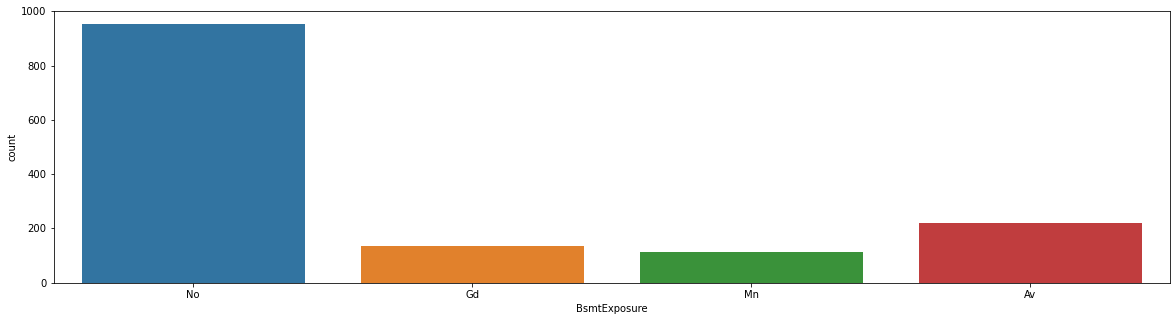

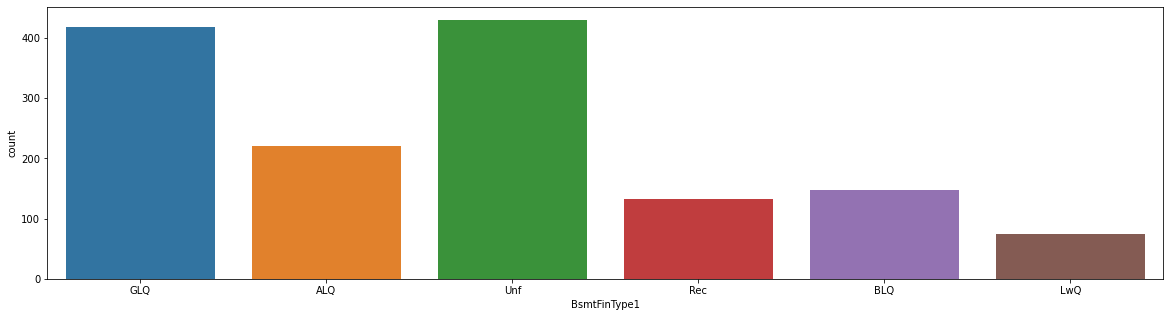

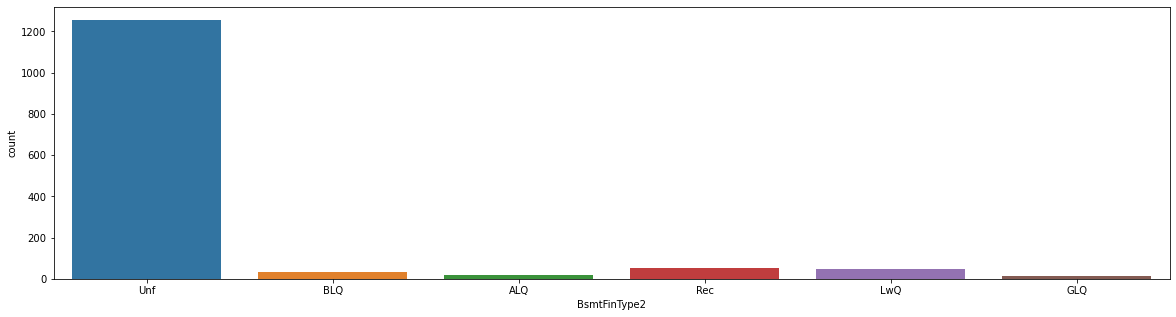

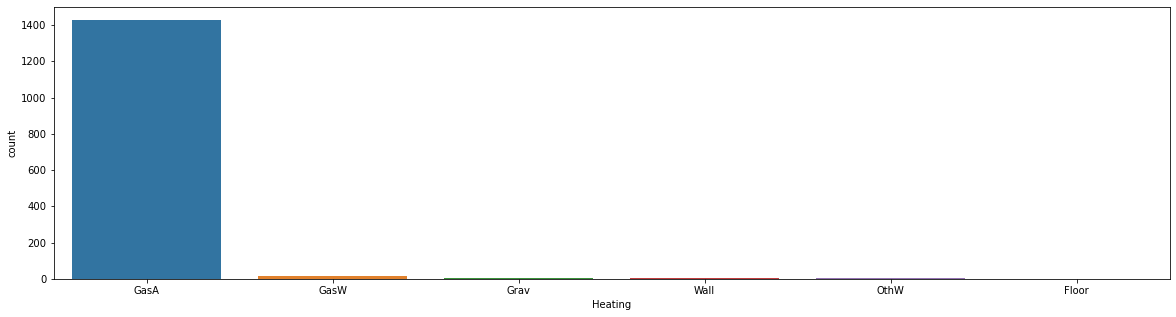

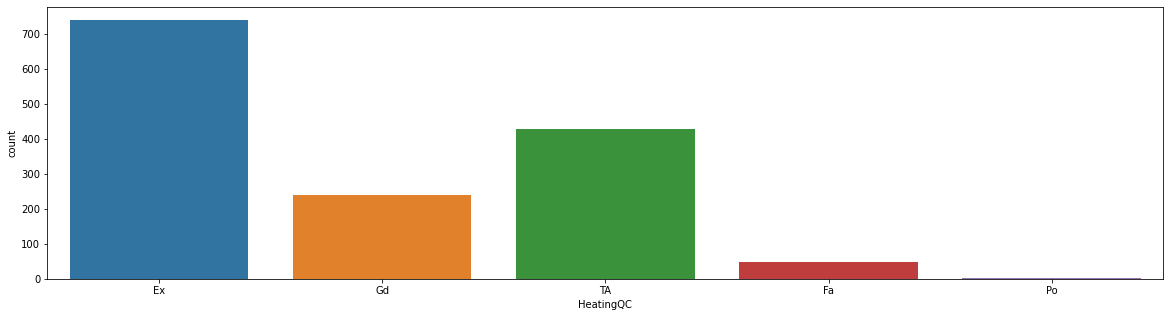

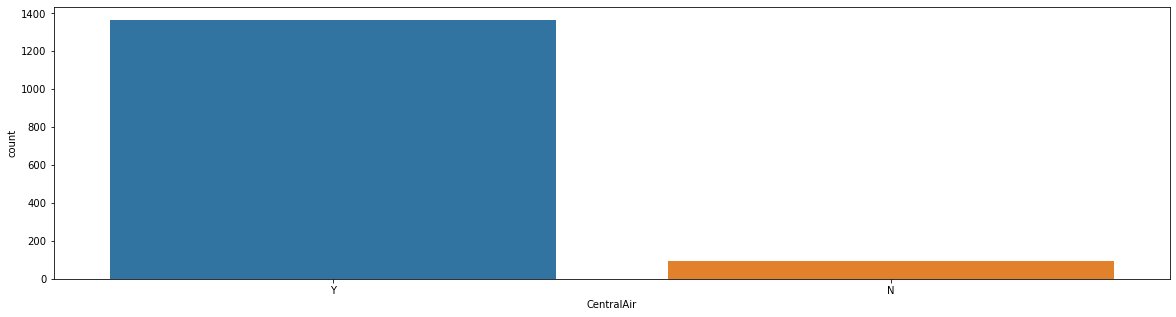

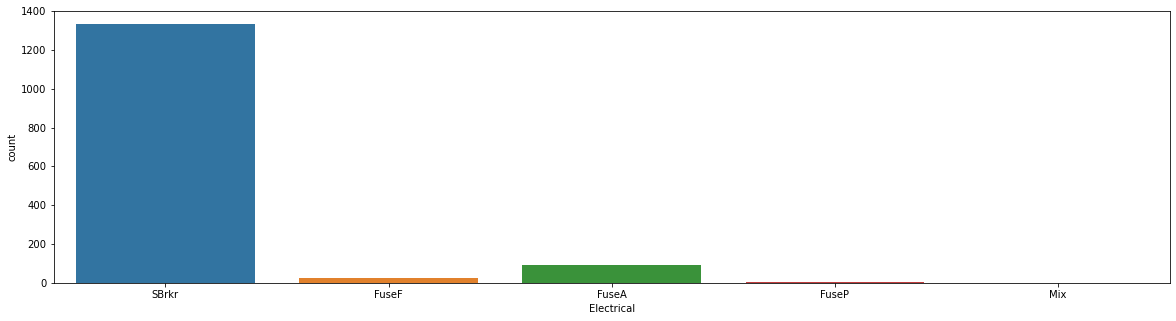

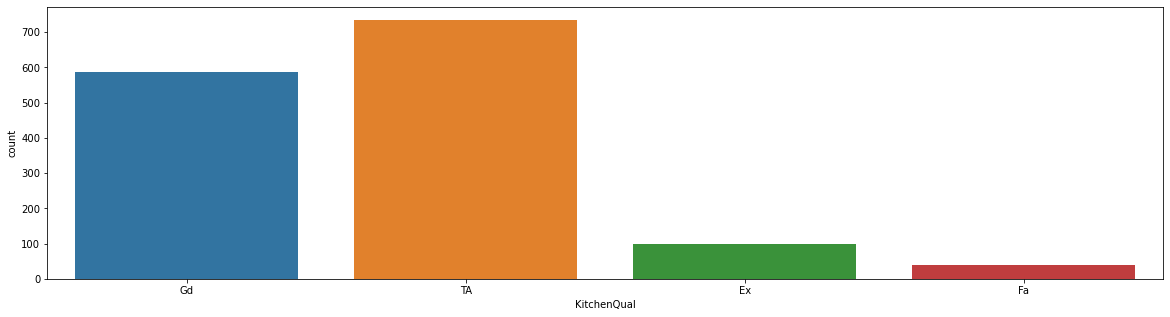

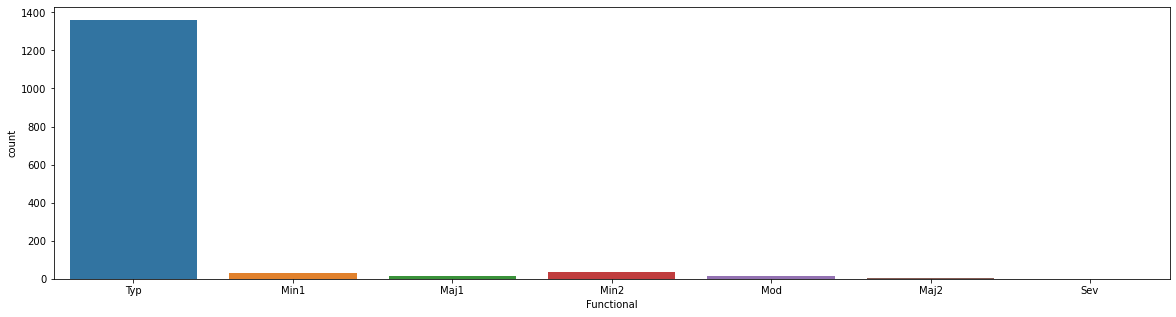

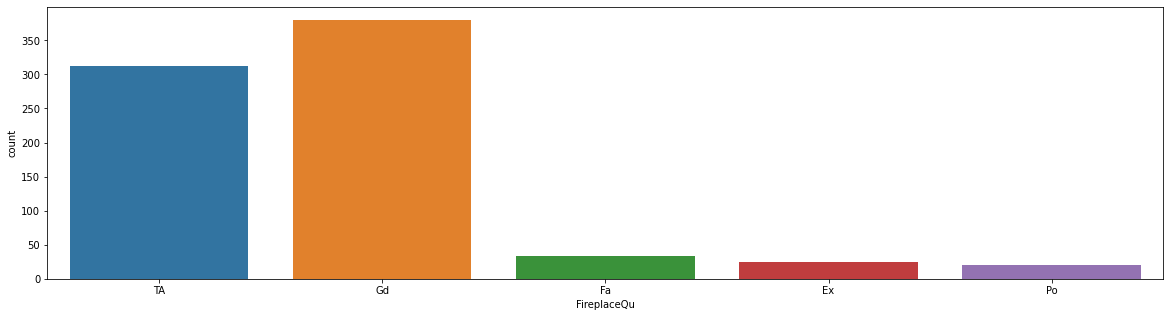

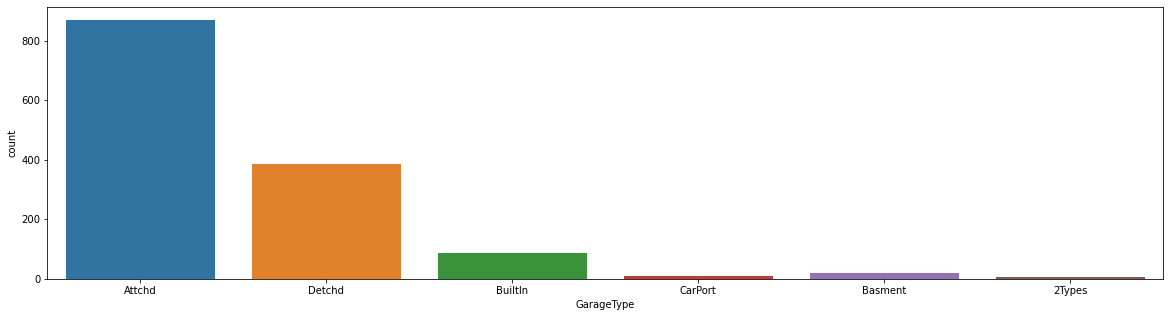

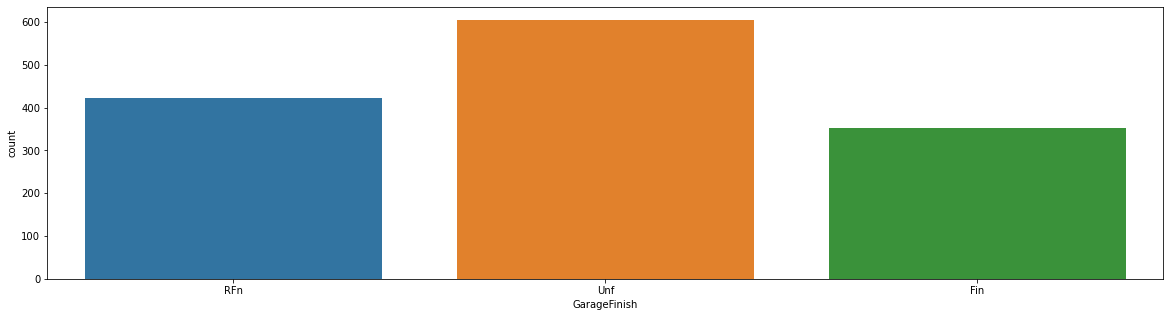

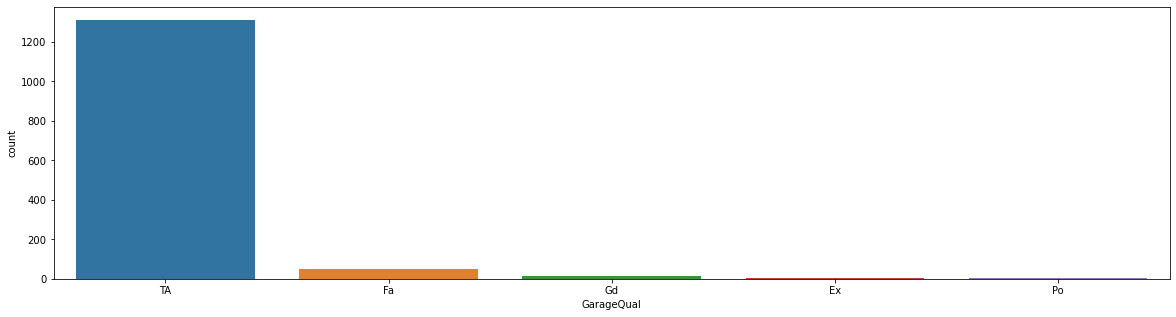

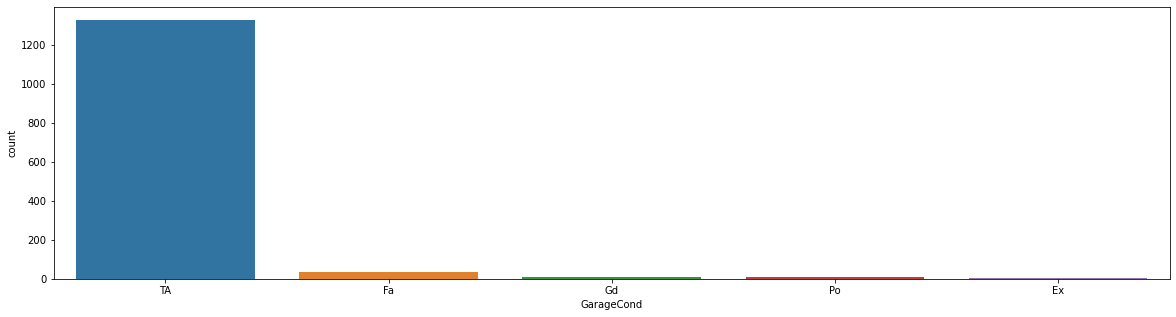

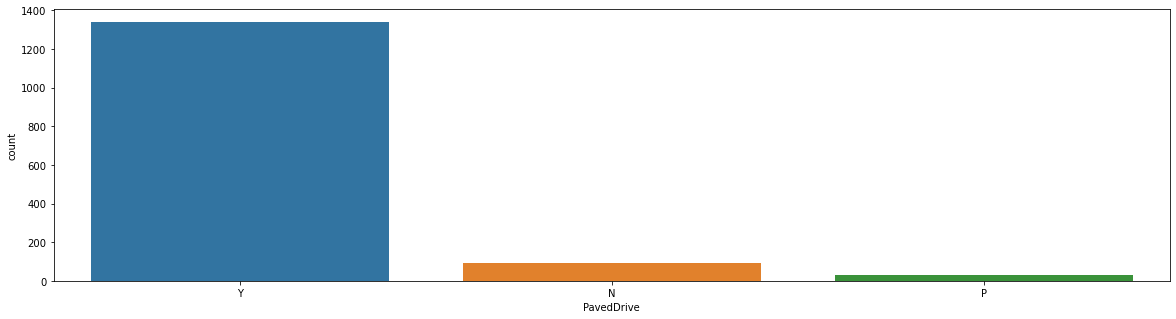

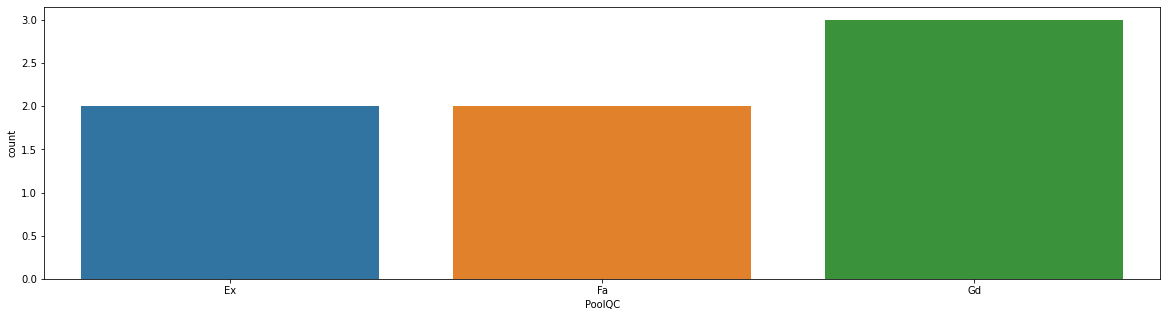

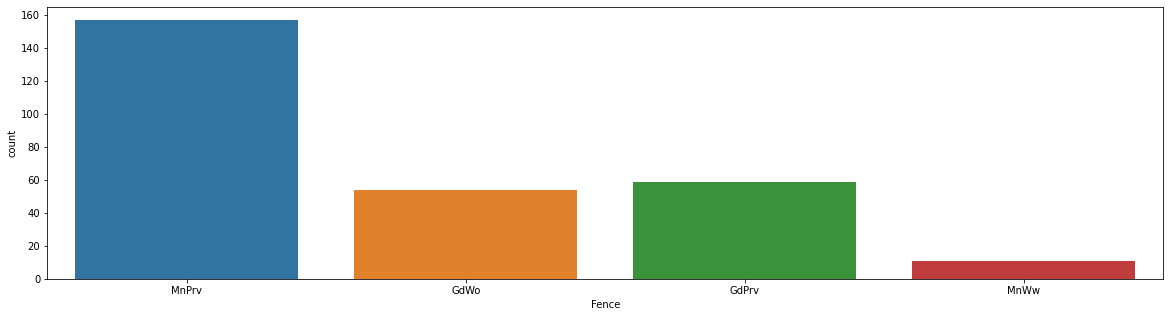

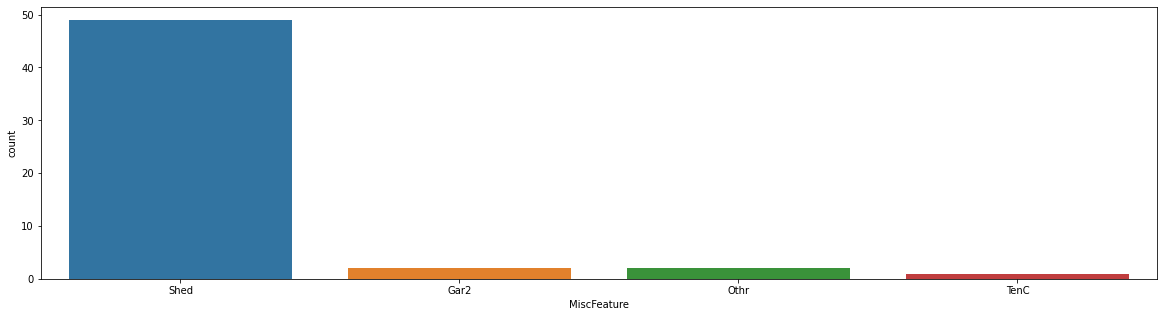

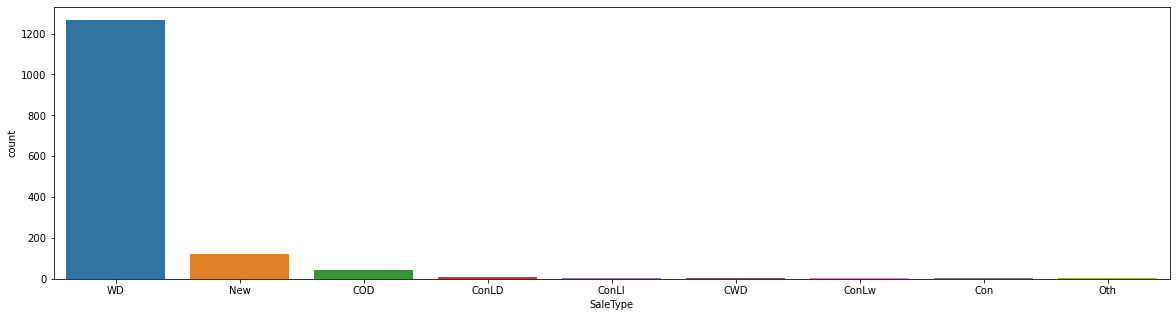

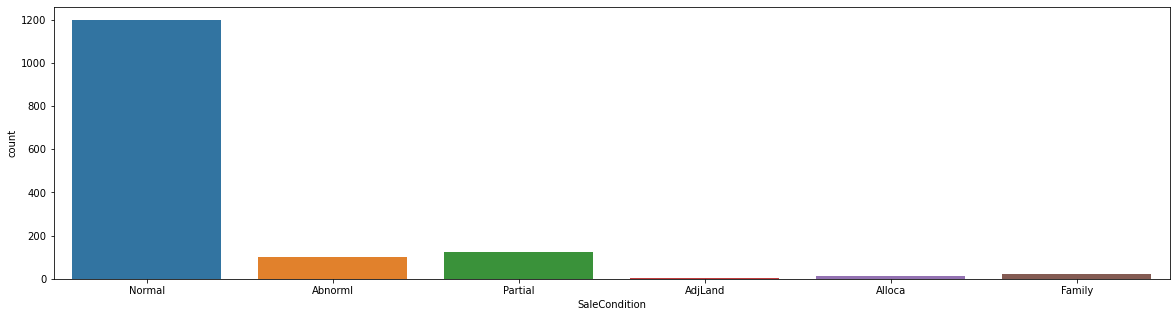

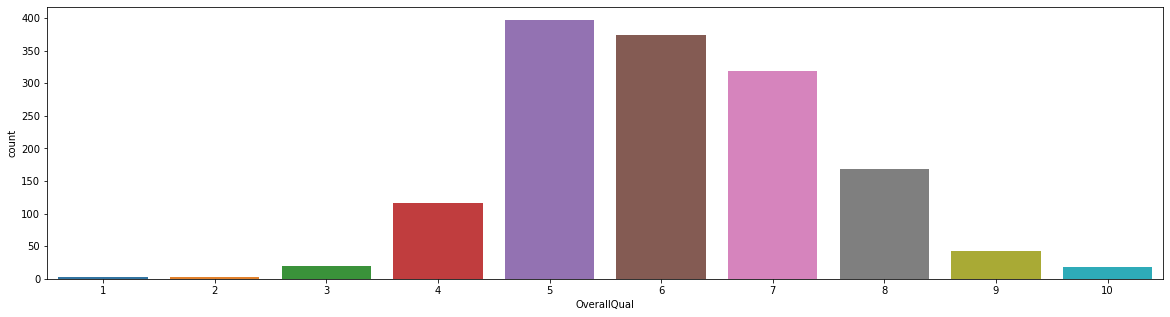

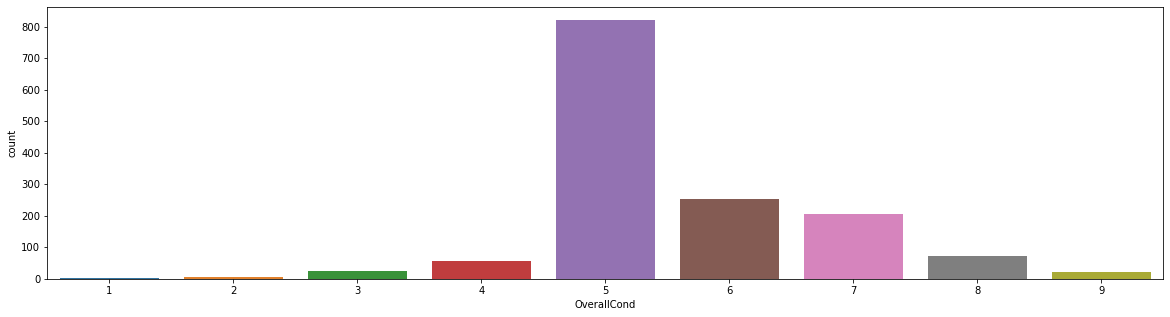

In [148]:
for i in cat_ord:
    count_plot(i,data)

Pairplots to show relations among the features (numerical):

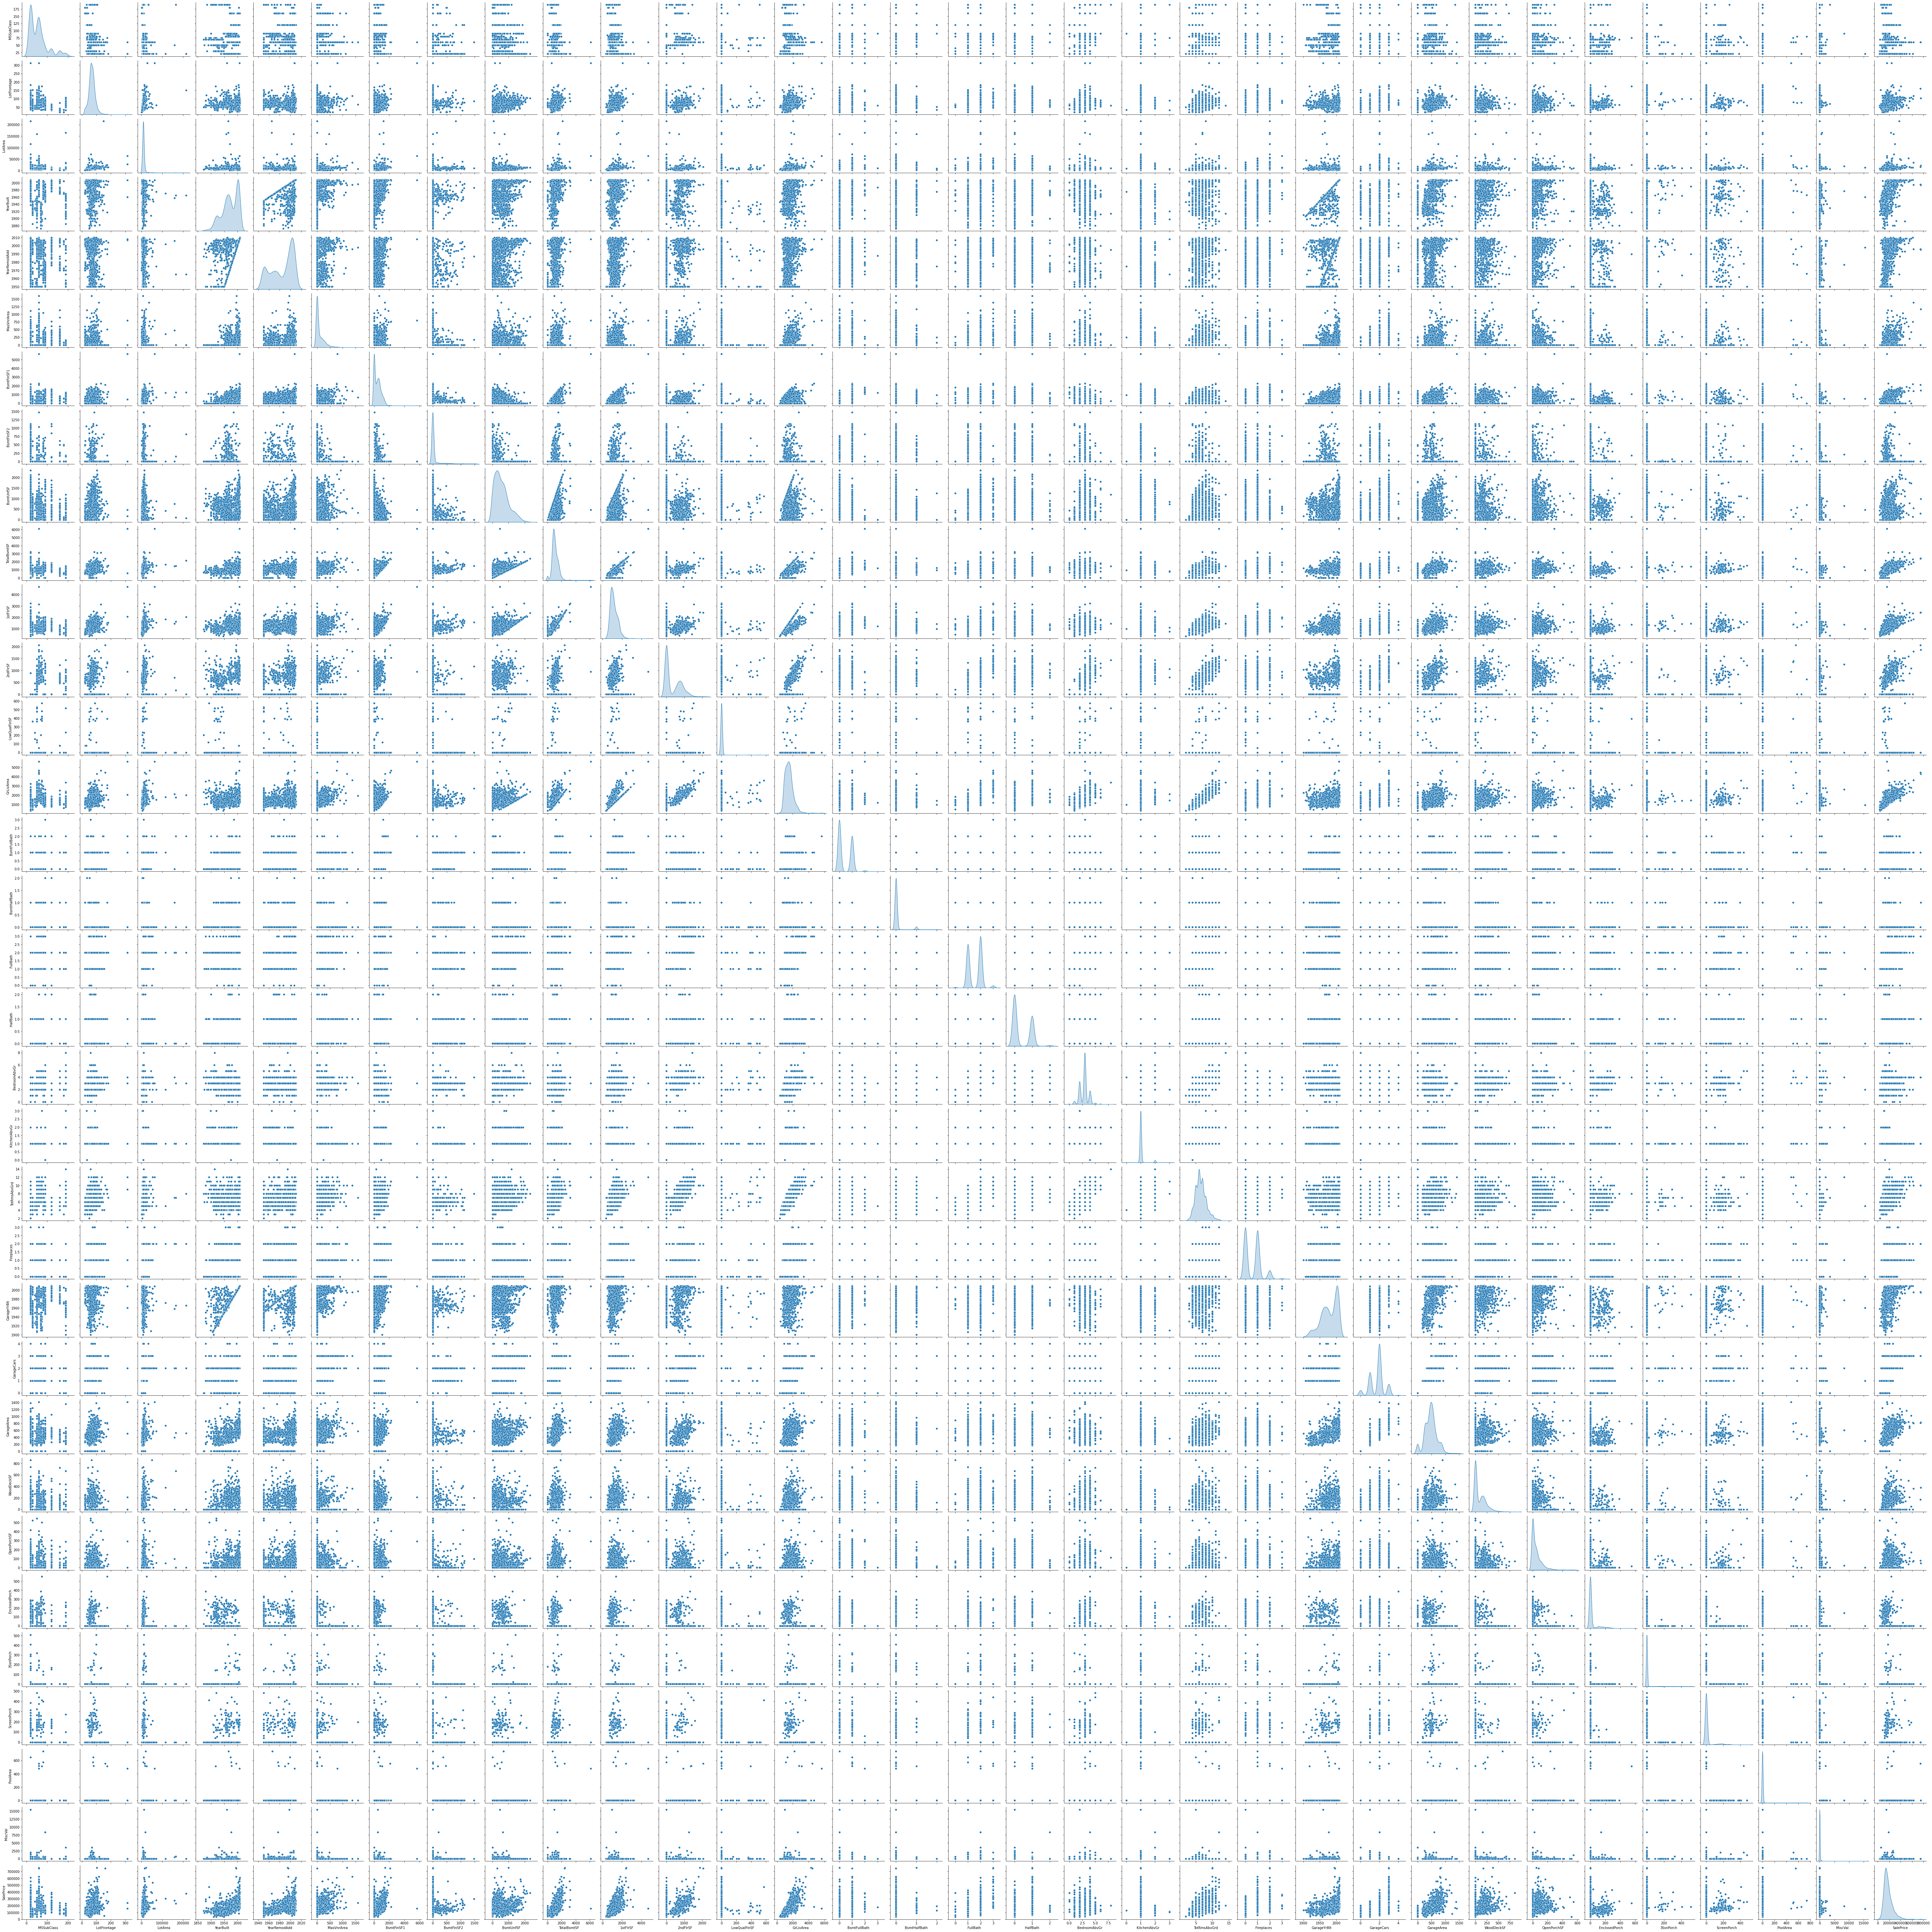

In [150]:
sns.pairplot(numeric_data,diag_kind='kde')

#### Correlation among features:

In [151]:
corr = (numeric_data).corr()
corr

MSSubClass  LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
MSSubClass       1.000000    -0.386347 -0.139781   0.027850      0.040581   
LotFrontage     -0.386347     1.000000  0.426095   0.123349      0.088866   
LotArea         -0.139781     0.426095  1.000000   0.014228      0.013788   
YearBuilt        0.027850     0.123349  0.014228   1.000000      0.592855   
YearRemodAdd     0.040581     0.088866  0.013788   0.592855      1.000000   
MasVnrArea       0.022936     0.193458  0.104160   0.315707      0.179618   
BsmtFinSF1      -0.069836     0.233633  0.214103   0.249503      0.128451   
BsmtFinSF2      -0.065649     0.049900  0.111170  -0.049107     -0.067759   
BsmtUnfSF       -0.140759     0.132644 -0.002618   0.149040      0.181133   
TotalBsmtSF     -0.238518     0.392075  0.260833   0.391452      0.291066   
1stFlrSF        -0.251758     0.457181  0.299475   0.281986      0.240379   
2ndFlrSF         0.307886     0.080177  0.050986   0.010308      0.140024   
LowQualFinSF     0.046474     0.038469  0.004779  -0.183784     -0.062419   
GrLivArea        0.074853     0.402797  0.263116   0.199010      0.287389   
BsmtFullBath     0.003491     0.100949  0.158155   0.187599      0.119470   
BsmtHalfBath    -0.002333    -0.007234  0.048046  -0.038162     -0.012337   
FullBath         0.131608     0.198769  0.126031   0.468271      0.439046   
HalfBath         0.177354     0.053532  0.014259   0.242656      0.183331   
BedroomAbvGr    -0.023438     0.263170  0.119690  -0.070651     -0.040581   
KitchenAbvGr     0.281721    -0.006069 -0.017784  -0.174800     -0.149598   
TotRmsAbvGrd     0.040380     0.352096  0.190015   0.095589      0.191740   
Fireplaces      -0.045569     0.266639  0.271364   0.147716      0.112581   
GarageYrBlt      0.085072     0.070250 -0.024947   0.825667      0.642277   
GarageCars      -0.040110     0.285691  0.154871   0.537850      0.420622   
GarageArea      -0.098672     0.344997  0.180403   0.478954      0.371600   
WoodDeckSF      -0.012579     0.088521  0.171698   0.224880      0.205726   
OpenPorchSF     -0.006100     0.151972  0.084774   0.188686      0.226298   
EnclosedPorch   -0.012037     0.010700 -0.018340  -0.387268     -0.193919   
3SsnPorch       -0.043825     0.070029  0.020423   0.031355      0.045286   
ScreenPorch     -0.026030     0.041383  0.043160  -0.050364     -0.038740   
PoolArea         0.008283     0.206167  0.077672   0.004950      0.005829   
MiscVal         -0.007683     0.003368  0.038068  -0.034383     -0.010286   
SalePrice       -0.084284     0.351799  0.263843   0.522897      0.507101   

               MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass       0.022936   -0.069836   -0.065649  -0.140759    -0.238518   
LotFrontage      0.193458    0.233633    0.049900   0.132644     0.392075   
LotArea          0.104160    0.214103    0.111170  -0.002618     0.260833   
YearBuilt        0.315707    0.249503   -0.049107   0.149040     0.391452   
YearRemodAdd     0.179618    0.128451   -0.067759   0.181133     0.291066   
MasVnrArea       1.000000    0.264736   -0.072319   0.114442     0.363936   
BsmtFinSF1       0.264736    1.000000   -0.050117  -0.495251     0.522396   
BsmtFinSF2      -0.072319   -0.050117    1.000000  -0.209294     0.104810   
BsmtUnfSF        0.114442   -0.495251   -0.209294   1.000000     0.415360   
TotalBsmtSF      0.363936    0.522396    0.104810   0.415360     1.000000   
1stFlrSF         0.344501    0.445863    0.097117   0.317987     0.819530   
2ndFlrSF         0.174561   -0.137079   -0.099260   0.004469    -0.174512   
LowQualFinSF    -0.069071   -0.064503    0.014807   0.028167    -0.033245   
GrLivArea        0.390857    0.208171   -0.009640   0.240257     0.454868   
BsmtFullBath     0.085310    0.649212    0.158678  -0.422900     0.307351   
BsmtHalfBath     0.026673    0.067418    0.070948  -0.095804    -0.000315   
FullBath         0.276833    0.058543   -0.076444   0.288886     0.323722   
HalfBath  

#### Visualizing correlation using heatmap:

<AxesSubplot:>

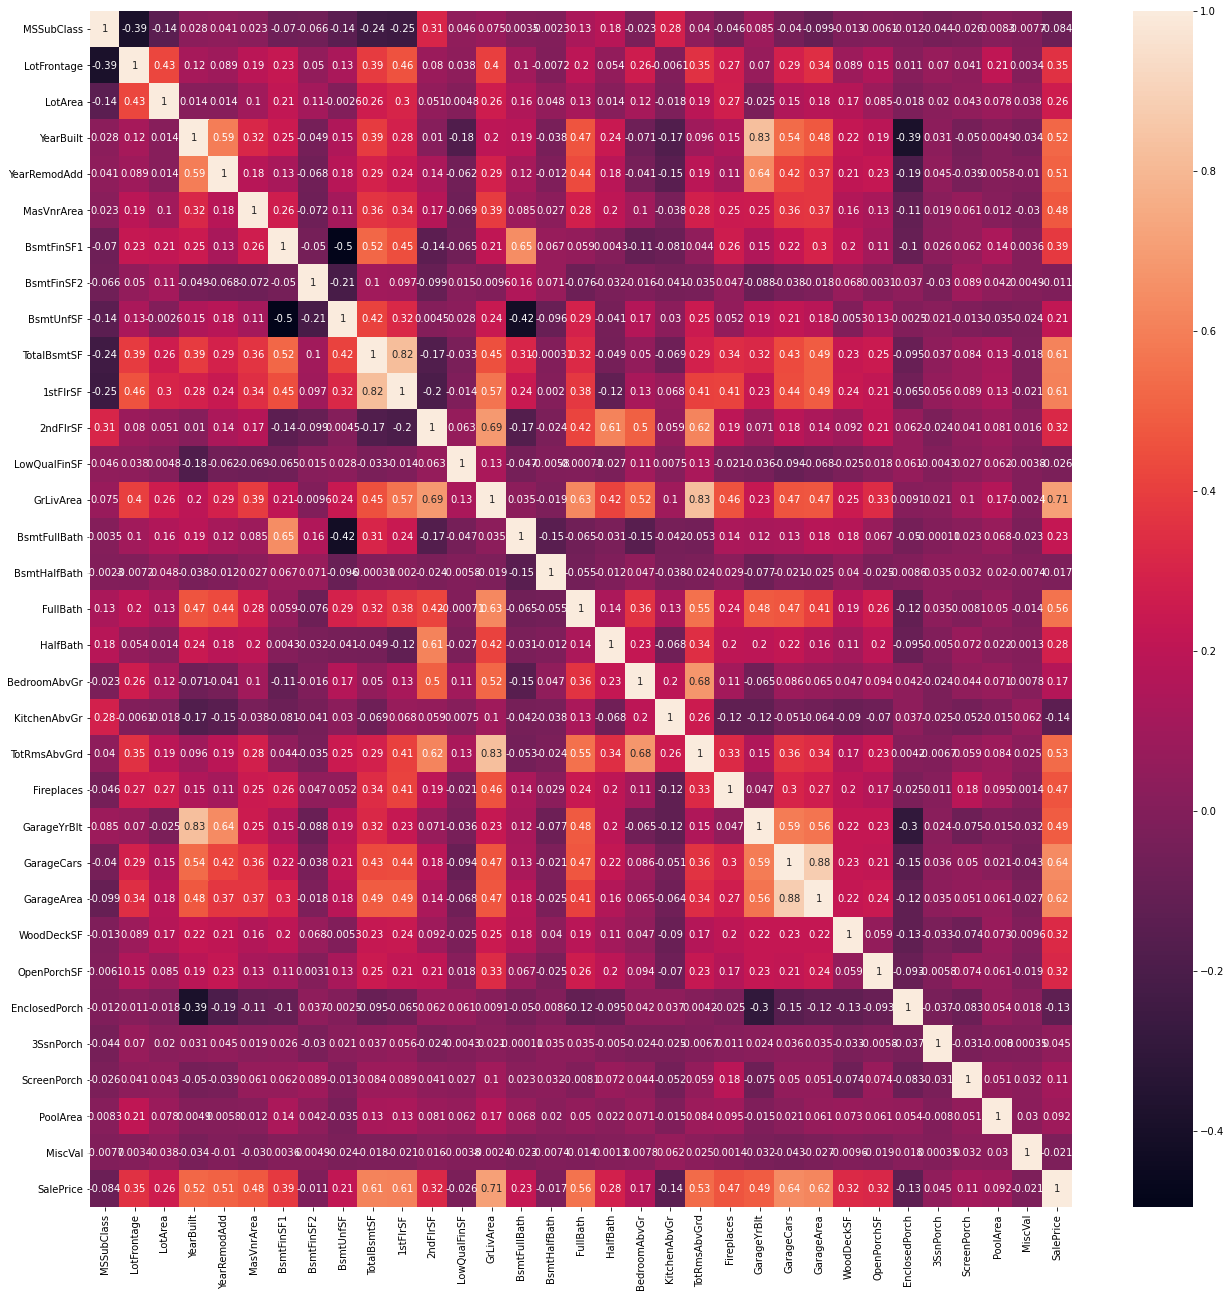

In [152]:
fig, ax = plt.subplots(figsize=(22,22))  
sns.heatmap(corr,annot=True)

#### High correlation between "independent" variables:
<br>
GarageCars & GarageArea: 0.88,
<br>
GarageYrBlt & YearBlt: 0.83,
<br>
TotRmsAbvGrd & GrLiveArea: 0.83,
<br>
1stFlrSF & TotalBsmtSF: 0.82
<br>

#### Poor correlation with SalePrice:
<br>
MSSubClass:0.084,
<br>
OverallCond:-0.078,
<br>
BsmtFinSF2:-0.011,
<br>
LowQualFinSF:-0.026,
<br>
BsmtHalfBath:-0.017,
<br>
3SsnPorch,PoolArea,MiscVal,MoSold,YrSold

#### Boxplots to view distribution, mean and outliers:

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

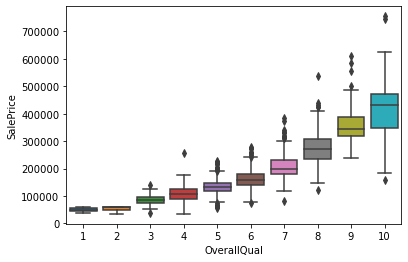

In [19]:
sns.boxplot(x='OverallQual', y='SalePrice',data=data)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

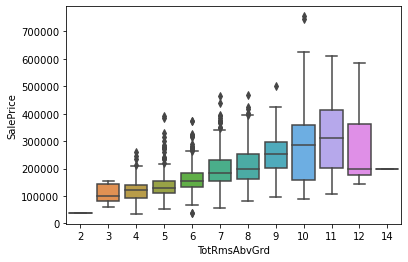

In [20]:
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice',data=data)

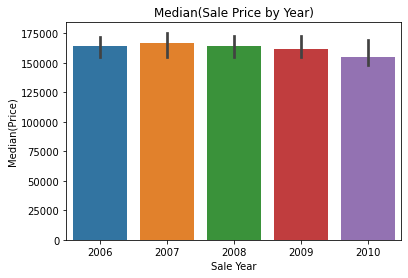

In [21]:
# Median of Sale Price by Year

sns.barplot(x='YrSold', y="SalePrice", data = data, estimator = np.median)
plt.title('Median(Sale Price by Year)')
plt.xlabel('Sale Year')
plt.ylabel('Median(Price)')
plt.show()

Approximately same median price over the years, doesnt show much correlation

## Transform 


#### Log transform:

In [296]:
def log_transform(var):
    data[var] = np.log1p(data[var].values)
    
logt = ['GrLivArea','1stFlrSF','2ndFlrSF','TotalBsmtSF','LotArea','LotFrontage','KitchenAbvGr','GarageArea']
for i in logt:
    log_transform(i)


#### Johnson SU:

In [297]:
import scipy.stats as stats

def johnson(y):
    gamma, eta, epsilon, lbda = stats.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon


#### Inverse tranforms

In [298]:
yt, g, et, ep, l = johnson(Y)
yt2 = johnson_inverse(yt, g, et, ep, l) #back to Y

### Adding new features:

In [299]:
# new features

# binary value features
data['HasBasement'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['HasGarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['Has2Floor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['HasMasVnr'] = data['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
data['HasWoodDeck'] = data['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
data['HasPorch'] = data['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
data['HasPool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)


data["LivLotRatio"] = data['GrLivArea'] / data['LotArea']
data["SpacePerRoom"] = (data['1stFlrSF'] + data['2ndFlrSF']) / data['TotRmsAbvGrd']
data['YrBltAndRemod']= data['YearBuilt'] + data['YearRemodAdd']
data['TotalSF'] = (data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'])
data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF'])
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))
data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF'])


### Drop useless features:



In [300]:
data=data.drop(columns=['MiscVal','MoSold','YrSold','Street','PoolQC','MiscFeature'],axis=1,inplace=False)

### Encoding categorical features:

In [301]:
dummied = pd.get_dummies(data)
dummied.sample()

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
1021  1022     4.174387  8.910181       2006          2006        84.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_Oth  \
1021       684.0         0.0      515.0     7.090077  ...             0   

      SaleType_WD  SaleType_None  SaleCondition_Abnorml  \
1021            0              0                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1021                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  SaleCondition_None  
1021                     0                      1                   0  

[1 rows x 373 columns]

#### Splitting back to train test sets

In [302]:
train_data = dummied[:train_len]
test_data = dummied[train_len:]
test_id=test_data.index
test_data.head()

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0  1461     4.394449  9.360741       1961          1961         0.0   
1  1462     4.406719  9.565775       1958          1958       108.0   
2  1463     4.317488  9.534668       1997          1998         0.0   
3  1464     4.369448  9.208238       1998          1998        20.0   
4  1465     3.784190  8.518392       1992          1992         0.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_Oth  \
0       468.0       144.0      270.0     6.783325  ...             0   
1       923.0         0.0      406.0     7.192934  ...             0   
2       791.0         0.0      137.0     6.834109  ...             0   
3       602.0         0.0      324.0     6.831954  ...             0   
4       263.0         0.0     1017.0     7.155396  ...             0   

   SaleType_WD  SaleType_None  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            1              0                      0                      0   
1            1              0                      0                      0   
2            1              0                      0                      0   
3            1              0                      0                      0   
4            1              0                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1                     0                     0                     1   
2                     0                     0                     1   
3                     0                     0                     1   
4                     0                     0                     1   

   SaleCondition_Partial  SaleCondition_None  
0                      0                   0  
1                      0                   0  
2                      0                   0  
3                      0                   0  
4                      0                   0  

[5 rows x 373 columns]

In [330]:
print(train_len,test_len)
print()
print(len(train_data),len(test_data))

1460 1459

1460 1459


### train/ validation splits for model training

In [304]:
from sklearn.model_selection import train_test_split

X = train_data

x_train,x_val,y_train,y_val = train_test_split(X,yt,test_size=0.25)

In [305]:
x_val

Id  LotFrontage    LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
124    125     3.891820   9.743554       1979          1998         0.0   
1359  1360     4.867534   9.725437       2004          2005        66.0   
1042  1043     3.555348   8.590815       2005          2005       135.0   
1220  1221     4.204693   8.962007       1964          1964         0.0   
1259  1260     4.189655   9.185125       1969          1969         0.0   
...    ...          ...        ...        ...           ...         ...   
1003  1004     0.000000   9.350189       1976          1976       164.0   
21      22     4.060443   8.915969       1930          1950         0.0   
1169  1170     4.779123  10.484613       1995          1996      1378.0   
1379  1380     4.304065   9.183586       2006          2007         0.0   
192    193     4.234107   9.106978       1999          1999         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_Oth  \
124          0.0         0.0     1362.0     7.217443  ...             0   
1359      1447.0         0.0      533.0     7.591357  ...             0   
1042       900.0         0.0      406.0     7.175490  ...             0   
1220       312.0       600.0        0.0     6.816736  ...             0   
1259       602.0       438.0       14.0     6.961296  ...             0   
...          ...         ...        ...          ...  ...           ...   
1003         0.0         0.0     1680.0     7.427144  ...             0   
21           0.0         0.0      637.0     6.458338  ...             0   
1169      1387.0         0.0      543.0     7.565793  ...             0   
1379         0.0         0.0      384.0     5.953243  ...             0   
192        560.0         0.0      871.0     7.266827  ...             0   

      SaleType_WD  SaleType_None  SaleCondition_Abnorml  \
124             1              0                      0   
1359            1              0                      0   
1042            1              0                      0   
1220            1              0                      1   
1259            1              0                      0   
...           ...            ...                    ...   
1003            1              0                      0   
21              1              0                      0   
1169            1              0                      0   
1379            1              0                      0   
192             1              0                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
124                       0                     0                     0   
1359                      0                     0                     0   
1042                      0                     0                     0   
1220                      0                     0                     0   
1259                      0                     0                     0   
...                     ...                   ...                   ...   
1003                      0                     0                     0   
21                        0                     0                     0   
1169                      0                     0                     0   
1379                      0                     0                     0   
192                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  SaleCondition_None  
124                      1                      0                   0  
1359                     1                      0                   0  
1042                     1                      0                   0  
1220                     0                      0                   0  
1259                     1                      0                   0  
...                    ...                    ...                 ...  
1003                     1                      0                   0  
21                  

## Metrics:


In [310]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error"))
    return (rmse)

## Models:

### XGBoost:

In [334]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=1000, max_depth=4, eta=0.03, subsample=0.7, colsample_bytree=0.6)

In [335]:
model.fit(x_train,y_train)
y_pred = model.predict(x_val)

rmse(y_val,y_pred)

0.06186531613117291

### Gradient Boost:

In [351]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
score_gbr = cv_rmse(model)
#cv_scores.append(score_gbr.mean())
#cv_std.append(score_gbr.std())
score_gbr

array([0.01151765, 0.01959909, 0.01292679, 0.03205802, 0.01212418])

In [352]:
model.fit(x_train,y_train)
y_pred = model.predict(x_val)

rmse(y_val,y_pred)

0.018348103073962847

### Scores: <br>
GBR: rmse = 0.017407091238035282 <br>
XGBR: rmse = 0.06186531613117291 <br>

## Final predict


Using GBR model:

In [353]:
y_test_pred = model.predict(test_data)
y_test_pred

array([-2.27407818, -2.11132873, -1.7336622 , ..., -1.91283967,
       -2.31752385, -1.46056992])

In [354]:
test_pred_act=johnson_inverse(y_test_pred, g, et, ep, l)
test_pred_act

array([66709.0360342 , 73297.34812182, 87761.55656887, ...,
       81005.41590135, 64898.52537989, 97917.72873508])

In [355]:
test_data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458],
           dtype='int64', length=1459)

In [356]:
test_data['SalePrice']=test_pred_act
test_data['Id']=test_data.index
test_data['Id'] = test_data['Id'].apply(lambda x: x + train_len+1)
test_data

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0     1461     4.394449  9.360741       1961          1961         0.0   
1     1462     4.406719  9.565775       1958          1958       108.0   
2     1463     4.317488  9.534668       1997          1998         0.0   
3     1464     4.369448  9.208238       1998          1998        20.0   
4     1465     3.784190  8.518392       1992          1992         0.0   
...    ...          ...       ...        ...           ...         ...   
1454  2915     3.091042  7.568896       1970          1970         0.0   
1455  2916     3.091042  7.546974       1970          1970         0.0   
1456  2917     5.081404  9.903538       1960          1996         0.0   
1457  2918     4.143135  9.253591       1992          1992         0.0   
1458  2919     4.317488  9.172431       1993          1994        94.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_Oth  \
0          468.0       144.0      270.0     6.783325  ...             0   
1          923.0         0.0      406.0     7.192934  ...             0   
2          791.0         0.0      137.0     6.834109  ...             0   
3          602.0         0.0      324.0     6.831954  ...             0   
4          263.0         0.0     1017.0     7.155396  ...             0   
...          ...         ...        ...          ...  ...           ...   
1454         0.0         0.0      546.0     6.304449  ...             0   
1455       252.0         0.0      294.0     6.304449  ...             0   
1456      1224.0         0.0        0.0     7.110696  ...             0   
1457       337.0         0.0      575.0     6.816736  ...             0   
1458       758.0         0.0      238.0     6.904751  ...             0   

      SaleType_WD  SaleType_None  SaleCondition_Abnorml  \
0               1              0                      0   
1               1              0                      0   
2               1              0                      0   
3               1              0                      0   
4               1              0                      0   
...           ...            ...                    ...   
1454            1              0                      0   
1455            1              0                      1   
1456            1              0                      1   
1457            1              0                      0   
1458            1              0                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  SaleCondition_None  
0                        1                      0                   0  
1                        1                      0                   0  
2                        1                      0                   0  
3                        1                      0                   0  
4                        1                      0                   0  
...                    ...                    ...                 ...  
1454                     1                      0                   0  
1455                     0      

In [357]:
result=test_data[['Id','SalePrice']]
result

Id     SalePrice
0     1461  66709.036034
1     1462  73297.348122
2     1463  87761.556569
3     1464  94790.463520
4     1465  90365.482931
...    ...           ...
1454  2915  60402.910847
1455  2916  62978.690849
1456  2917  81005.415901
1457  2918  64898.525380
1458  2919  97917.728735

[1459 rows x 2 columns]

In [358]:
result.to_csv('result.csv', index=False)